# Working with Numpy FFT Results: Scaling and Folding

Imports
-------

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Create a Test Signal
--------------------
$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to extract those correctly from the FFT later.

In [70]:
from numpy import genfromtxt
x = genfromtxt('mixer_qubic_30.csv', delimiter=',')
# x = genfromtxt('mixer_qubic_60.csv', delimiter=',')

In [71]:
# f_s = len(x[:,0])/(x[-1,0]-x[1,0])
# time = x[:,0]

In [72]:
T_s = np.mean(np.diff(x[:,0]))
f_s = 1/T_s

time = x[:,0]

In [73]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'x')

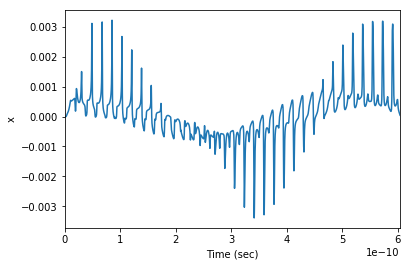

In [74]:
ax = plt.subplot(111)
ax.set_xlim([0, time[2000]])

plt.plot(time, x[:,1])
plt.xlabel("Time (sec)")
plt.ylabel("x")

Text(0, 0.5, 'x')

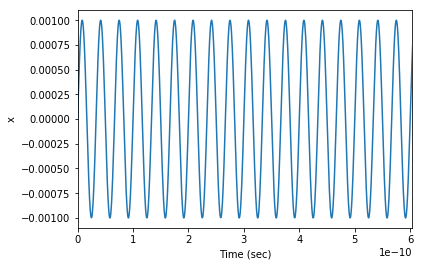

In [75]:
ax = plt.subplot(111)
ax.set_xlim([0, time[2000]])

plt.plot(time, x[:,3])
plt.xlabel("Time (sec)")
plt.ylabel("x")

Compute the FFT
---------------
The FFT and a matching vector of frequencies

In [76]:
fft_in = np.fft.fft(x[:,3])
n = len(fft_in)

fft_out = np.fft.fft(x[:,1])
n = len(fft_out)

freq = np.fft.fftfreq(n, 1/f_s)

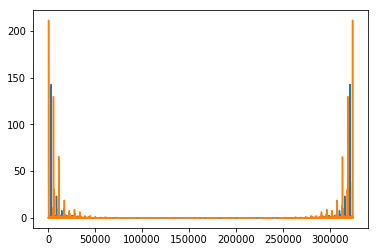

In [77]:
ax = plt.subplot(111)

plt.plot(np.abs(fft_in))
plt.plot(np.abs(fft_out))

Swap Half Spaces
----------------
Note that frequencies in the FFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum.

In [78]:
fft_in_shifted = np.fft.fftshift(fft_in)
fft_out_shifted = np.fft.fftshift(fft_out)

freq_shifted = np.fft.fftshift(freq)

Text(0.5, 0, 'Frequency (Hz)')

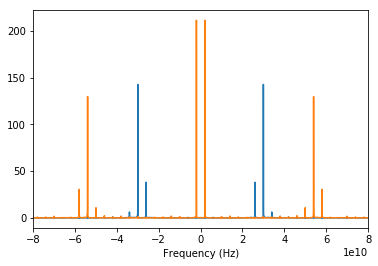

In [79]:
ax = plt.subplot(111)
ax.set_xlim([-80e9, 80e9])

plt.plot(freq_shifted, np.abs(fft_in_shifted))
plt.plot(freq_shifted, np.abs(fft_out_shifted))
plt.xlabel("Frequency (Hz)")

Fold Negative Frequencies and Scale
------------------------------
It's actually more common to look at just the first half of the unshifted FFT and frequency vectors and fold all the amplitude information into the positive frequencies. Furthermore, to get ampltude right, we must normalize by the length of the original FFT. Note the factor of $2/n$ in the following which accomplishes both the folding and scaling.

In [80]:
half_n = np.ceil(n/2.0)

fft_in_half = (2.0 / n) * fft_in[:int(half_n)]
fft_out_half = (2.0 / n) * fft_out[:int(half_n)]

freq_half = freq[:int(half_n)]

Text(0, 0.5, 'Amplitude')

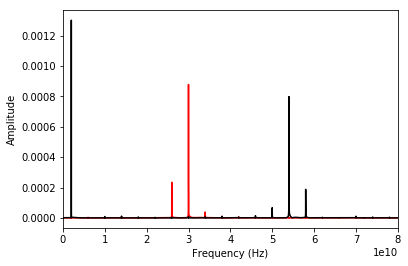

In [81]:
ax = plt.subplot(111)
ax.set_xlim([0, 80e9])

plt.plot(freq_half, np.abs(fft_in_half), color='red')
plt.plot(freq_half, np.abs(fft_out_half), color='black')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

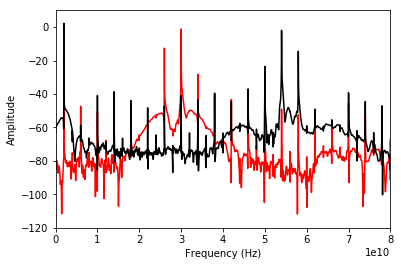

In [82]:
ax = plt.subplot(111)
ax.set_xlim([0, 80e9])
ax.set_ylim([-120, 10])

indB  = 20 * np.log10(np.abs(fft_in_half)/1e-3)
outdB = 20 * np.log10(np.abs(fft_out_half)/1e-3)

plt.plot(freq_half, indB, color='red')
plt.plot(freq_half, outdB, color='black')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Now the spectrum contains spikes at the correct amplitudes at only positive frequencies, which are the only ones with physicality.